# Team Members

1. Jyoti Kumari
2. Soham Siddhant Bidyadhar
3. Agnitra Das
4. Sarah Lee
5. Saaket Joshi
6. Rohan Giri

Write a scraper using Python to fetch messages posted in Edmunds.com discussion forums. The
scraper output should be a .csv file with the following columns: date and message (even though
you will only use the messages in your analysis). Before you develop the scraper, carefully study
one of the forums on Edmunds.com to understand the html design as well as the threading
structures.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def scrape_edmunds_forum(url, max_posts=5000):
    # List to store data
    data = []
    
    # Headers to mimic a browser visit
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
    }
    
    while len(data) < max_posts:
        # Fetch the content of the page
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all posts
        posts = soup.find_all('li', class_='Item')

        for post in posts:
            if len(data) >= max_posts:
                break
            try:
                # Extract date
                date_tag = post.find('span', class_='MItem DateCreated')
                date = date_tag.text.strip() if date_tag else 'No Date Available'

                # Extract message text
                message_div = post.find('div', class_='Message userContent')
                message = message_div.text.strip() if message_div else 'No Message Available'

                # Add to data list
                data.append({'date': date, 'message': message})
            except Exception as e:
                print(f"Error processing post: {e}")
                continue

        # Find the next page link
        next_button = soup.find('a', class_='Next')
        if next_button:
            url = next_button['href']
        else:
            break

        # Sleep to avoid overwhelming the server
        time.sleep(2)  # Adjust the sleep time if necessary

    # Create a DataFrame and save to CSV
    df = pd.DataFrame(data)
    df.to_csv('edmunds_forum_posts.csv', index=False)

if __name__ == "__main__":
    url = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'
    scrape_edmunds_forum(url)

## Task A:
Once you fetch the data, test if the data support Zipf’s law econometrically. Additionally plot the
most common 100 words in the data against the theoretical prediction of the law. For this question, do
not remove stopwords. Also do not perform stemming or lemmatization.
Check http://www.garysieling.com/blog/exploring-zipfs-law-with-python-nltk-scipy-and-matplotlib
(Note that the above link does NOT test Zipf’s law econometrically)

In [2]:
import csv
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.manifold import MDS
from collections import defaultdict, Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Input filename
input_filename = 'edmunds_forum_posts.csv'  # Input file

# Step 1: Extract sentences without removing stopwords
def extract_sentences_no_preprocessing(file):
    """
    Extracts text data from the second column of the CSV file without removing stopwords,
    splitting it into sentences and tokenizing without additional preprocessing.
    """
    sentences = []
    
    with open(file, mode='r', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        
        for row in reader:
            # Assuming the text to process is in the second column (index 1)
            text = row[1]

            # Split the text into sentences based on punctuation (.?!)
            sentences += re.split(r'[.!?]', text)

    print(f"Step 1 Complete: Extracted {len(sentences)} sentences.\n")
    return sentences

# Run the sentence extraction step
sentences = extract_sentences_no_preprocessing(input_filename)

Step 1 Complete: Extracted 46114 sentences.



In [4]:
# Step 2: Tokenize and count word frequencies
def calculate_word_frequencies_no_preprocessing(sentences):
    """
    Calculates the frequency of each word in the given list of sentences, 
    without removing stopwords or performing any preprocessing.
    """
    word_freq = defaultdict(int)
    
    for sentence in sentences:
        # Tokenize by splitting on whitespace
        words = sentence.split()
        
        # Count word frequencies
        for word in words:
            word_freq[word] += 1
    
    print("Step 2 Complete: Calculated word frequencies.\n")
    return word_freq

# Run the word frequency calculation
word_freq = calculate_word_frequencies_no_preprocessing(sentences)

Step 2 Complete: Calculated word frequencies.



In [5]:
# Step 3A: Display top 100 most frequent words
def display_top_100_words(word_freq):
    """
    Displays the top 100 most frequent words.
    """
    # Sort words by frequency (most common first)
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    # Extract top 100 words and their frequencies
    top_100_words = sorted_word_freq[:100]
    
    # Display the top 100 words and their frequencies
    print("Top 100 Most Frequent Words:")
    for i, (word, freq) in enumerate(top_100_words, 1):
        print(f"{i}. {word}: {freq}")
    
    return top_100_words

# Run the function to display top 100 words
top_100_words = display_top_100_words(word_freq)

Top 100 Most Frequent Words:
1. the: 24174
2. a: 11676
3. and: 9953
4. to: 9686
5. I: 9340
6. is: 7290
7. of: 6995
8. in: 6277
9. that: 5514
10. it: 4665
11. you: 4285
12. for: 4261
13. with: 3725
14. car: 3387
15. on: 3226
16. have: 3044
17. not: 2963
18. are: 2887
19. but: 2764
20. my: 2568
21. as: 2514
22. be: 2489
23. The: 2309
24. or: 2066
25. was: 2015
26. at: 1778
27. about: 1769
28. cars: 1752
29. they: 1703
30. more: 1693
31. like: 1686
32. this: 1632
33. than: 1623
34. an: 1575
35. all: 1542
36. BMW: 1510
37. TL: 1470
38. has: 1445
39. can: 1417
40. would: 1380
41. will: 1379
42. one: 1360
43. just: 1315
44. if: 1294
45. me: 1285
46. 3: 1269
47. what: 1258
48. get: 1257
49. -: 1235
50. out: 1233
51. your: 1179
52. think: 1175
53. from: 1157
54. so: 1095
55. do: 1082
56. don't: 1077
57. G35: 1031
58. it's: 1022
59. better: 896
60. up: 881
61. when: 880
62. by: 868
63. drive: 863
64. I'm: 862
65. had: 853
66. much: 850
67. there: 844
68. some: 838
69. new: 833
70. no: 831
71. o

In [6]:
# Step 3B: Test the given formula econometrically without an intercept
def test_custom_zipf_law_no_intercept(top_100_words):
    """
    Tests the modified Zipf's law by regressing log(rank) on log(x(r)/n*x(n)),
    without an intercept.
    """
    # Get ranks and frequencies for the econometric test
    ranks = np.array(list(range(1, len(top_100_words) + 1)))  # Rank from 1 to 100
    frequencies = np.array([freq for word, freq in top_100_words])  # Corresponding frequencies
    
    # The frequency of the word with the highest rank (i.e., rank 1)
    freq_max = frequencies[99]
    n = len(frequencies)
    
    # Compute log(x(r)/n*x(n)) and log(r)
    log_ratio = np.log(frequencies / (n * freq_max))
    log_ranks = np.log(ranks)
    
    # Run the regression without an intercept
    model = sm.OLS(log_ranks, log_ratio)
    results = model.fit()
    
    # Print regression summary
    print("\nRegression Results based on custom Zipf's Law formula (no intercept):\n")
    print(results.summary())
    
    return log_ranks, log_ratio, results

# Run the regression based on the modified formula (no intercept)
log_ranks, log_ratio, results = test_custom_zipf_law_no_intercept(top_100_words)


Regression Results based on custom Zipf's Law formula (no intercept):

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          5.346e+04
Date:                Sat, 05 Oct 2024   Prob (F-statistic):                   4.07e-137
Time:                        10:48:36   Log-Likelihood:                          40.530
No. Observations:                 100   AIC:                                     -79.06
Df Residuals:                      99   BIC:                                     -76.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t     

Model coefficient is -0.9893 with standard error of 0.004. Considering 2 standard error variation for 95% confidence interval, lower value of coefficient = -0.9973, which on rounding off is = -1. Hence, we can say this data follows Zipf's law econometrically.

## Task B:
Find the top 10 brands from frequency counts. You will need to write a script to count the
frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with
brands so that from now on you have to deal with only brands and not models. You will need another
script for this job. A list of model and brand names (not exhaustive) are provided in a separate file. Even
if a brand (e.g., BMW) is mentioned multiple times in a message, it should be counted as 1.

In [7]:
df = pd.read_csv("edmunds_forum_posts.csv")

In [8]:
def clean(comment):
    cleaned_comment = re.sub("[^\w\s]", " ", comment)
    cleaned_comment = cleaned_comment.replace("\n"," ")
    return cleaned_comment.lower()

In [9]:
df["message"] = df["message"].astype(str).map(clean)

In [10]:
# replacing models with make
make_model = pd.read_csv("car_models_and_brands_v1.csv")
make_model.drop_duplicates(inplace=True)
dictionary = dict(zip(make_model['Model'], make_model['Brand']))
def model_to_make(comment):
    words = comment.split()
    words1 = []
    for i in words:
        if i in dictionary.keys():
            words1.append(dictionary[i])
        else:
            words1.append(i)
    comment1 = " ".join(words1)
    return comment1
df["message"] = df["message"].map(model_to_make)

# considering unique words in a comment so that brands are counted once per comment
def unique_in_comment(comment):
    words = comment.split()
    words = list(set(words))
    comment1 = " ".join(words)
    return comment1
df["message"] = df["message"].map(unique_in_comment)

In [11]:
#removing stopwords
all_words = " ".join(df["message"])
word_list = all_words.split()
word_list = [i for i in word_list if i not in stop_words]

In [12]:
# creating the word-frequency dataframe
from collections import Counter
freq = Counter(word_list)
word = []
frequency = []
for item, count in freq.items():
    word.append(item)
    frequency.append(count)
df1 = pd.DataFrame({"Word":word,"Frequency":frequency})
df1.sort_values(by="Frequency",ascending=False,inplace=True)
df1.reset_index(drop=True,inplace=True)
df1.head()

,Word,Frequency
0,bmw,2608
1,car,2020
2,acura,1272
3,like,1261
4,cars,1245


# Task C:
Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have 
to write a script to do this task). For lift calculations, be sure not to count a mention more than onc 
per post, even if it is mentioned multiple times in the post. In your code, ensure that a message is n t
counted in the lift calculations if the mentions of two brands are separated by more than, say, 5 o  7
words.


In [13]:
# Top 10 brands obtained from Task B
brands = ["bmw", "acura", "honda", "audi", "infiniti", "lexus", "toyota", "nissan", "subaru", "volkswagen", "mercedes"] 


In [14]:
df = pd.read_csv("edmunds_forum_posts.csv")
stop_words = set(stopwords.words('english'))

In [15]:
# cleaning comments and coverting to lowercase
def clean(comment):
    cleaned_comment = re.sub("[^\w\s]", " ", comment)
    cleaned_comment = cleaned_comment.replace("\n"," ")
    word_list = cleaned_comment.split()
    cleaned_comment = " ".join(word_list)
    return cleaned_comment.lower()

df["message"] = df["message"].astype(str).map(clean)

In [16]:
#replacing models with make
make_model = pd.read_csv("car_models_and_brands_v1.csv")
make_model.drop_duplicates(inplace=True)
dictionary = dict(zip(make_model['Model'], make_model['Brand']))
def model_to_make(comment):
    words = comment.split()
    words1 = []
    for i in words:
        if i in dictionary.keys():
            words1.append(dictionary[i])
        else:
            words1.append(i)
    comment1 = " ".join(words1)
    return comment1
df["message"] = df["message"].map(model_to_make)

In [17]:
# creating a co_occurance_matrix
co_occurrence_matrix = pd.DataFrame(0, index=brands, columns=brands)

In [18]:
# specifying the co-occurance criteria (no counted if 2 brands in a comment are apart by more than 7 words)
for comment in df["message"]:
    words = comment.split()
    for brand1 in brands:
        if brand1 in words:
            b1_indices = [index for index, value in enumerate(words) if value == brand1]
            sur_words = set()  # using a set of surrounding words to avoid duplicates
            for k in b1_indices:
                # defining the window so that indices stay within bounds
                start = max(0, k - 7)
                end = min(len(words), k + 8)
                # adding the surrounding words to the set
                sur_words.update(words[start:end])
            for brand2 in brands:
                if brand2 in sur_words:
                    co_occurrence_matrix.loc[brand1, brand2] += 1

In [19]:
co_occurrence_matrix

,bmw,acura,honda,audi,infiniti,lexus,toyota,nissan,subaru,volkswagen,mercedes
bmw,2608,389,87,225,358,120,55,60,49,41,67
acura,389,1272,106,59,300,72,21,38,19,5,11
honda,87,106,457,7,24,9,92,53,7,8,4
audi,225,59,7,440,52,23,6,4,10,46,22
infiniti,358,300,24,52,1033,70,9,56,16,4,12
lexus,120,72,9,23,70,346,29,7,5,2,21
toyota,55,21,92,6,9,29,330,51,3,7,6
nissan,60,38,53,4,56,7,51,316,8,4,1
subaru,49,19,7,10,16,5,3,8,213,3,0
volkswagen,41,5,8,46,4,2,7,4,3,163,8


In [20]:
# creating the lift_matrix
lift_matrix = pd.DataFrame(0, index=brands, columns=brands)
total_comments = len(df)

In [21]:
# filling the created lif_matrix
for brand1 in brands:
    for brand2 in brands:
        lift_matrix.loc[brand1,brand2] = (total_comments * co_occurrence_matrix.loc[brand1,brand2])/(co_occurrence_matrix.loc[brand1,brand1] * co_occurrence_matrix.loc[brand2,brand2])

In [22]:
# showing lift values
lift_matrix_show = lift_matrix.copy()
for i in range(0,len(lift_matrix_show)):
    for j in range(0,i+1):
        lift_matrix_show.iloc[i,j] = ""
lift_matrix_show

,bmw,acura,honda,audi,infiniti,lexus,toyota,nissan,subaru,volkswagen,mercedes
bmw,,0.586307,0.364977,0.980375,0.664424,0.664917,0.31953,0.364021,0.441041,0.482235,0.721634
acura,,,0.911743,0.527087,1.141573,0.817974,0.250143,0.472693,0.350636,0.120577,0.242916
honda,,,,0.17406,0.254194,0.28459,3.050196,1.835028,0.359561,0.536978,0.245863
audi,,,,,0.572032,0.755386,0.206612,0.143843,0.533504,3.206916,1.404494
infiniti,,,,,,0.979246,0.132007,0.85777,0.363588,0.11878,0.32631
lexus,,,,,,,1.269925,0.320114,0.339222,0.177311,1.704878
toyota,,,,,,,,2.445339,0.213402,0.650679,0.510725
nissan,,,,,,,,,0.594283,0.388289,0.088892
subaru,,,,,,,,,,0.43204,0.0
volkswagen,,,,,,,,,,,1.378645


In [23]:
lift_matrix.to_csv("Lifts.csv",index=False)

In [24]:
# replacing zeros in the lift_matrix so that no value in dissimilarity matrix is infinity
lift_matrix = lift_matrix.replace(0,0.01)

In [25]:
dissimilarity_matrix = 1/lift_matrix
dissimilarity_matrix.to_csv("Dissimilarity.csv",index=False)

# Task D: 
Show the brands on a multi-dimensional scaling (MDS) map.

In [26]:
dissimilarity_matrix = pd.read_csv("Dissimilarity.csv")

In [27]:
# asssiging row indices to the dissimilarity matrix
dissimilarity_matrix.index = dissimilarity_matrix.columns


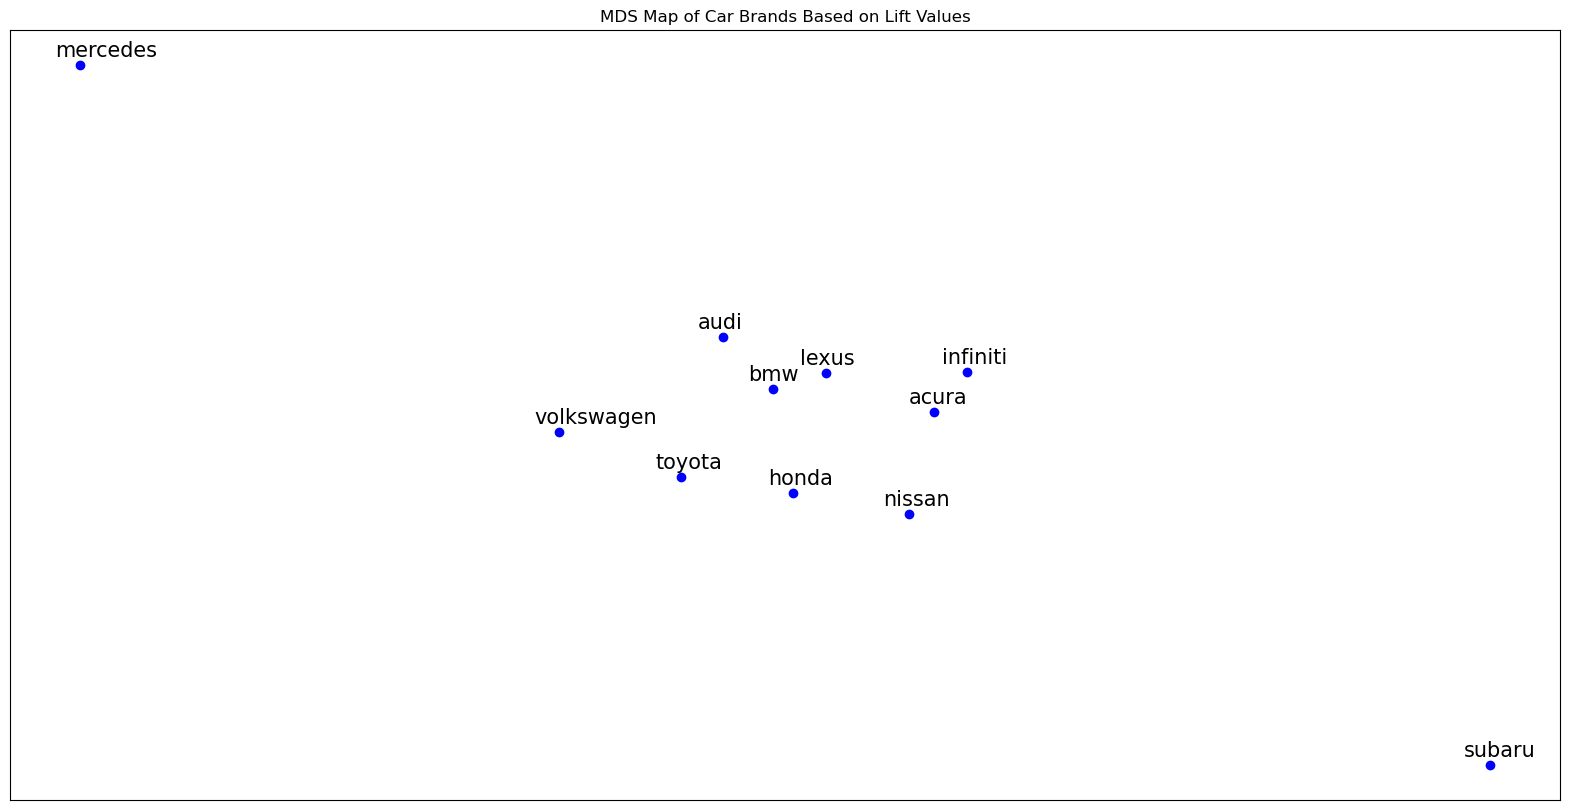

In [28]:
# running the MDS function from sklearn.manifold
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coordinates = mds.fit_transform(dissimilarity_matrix)

# plotting the MDS map
plt.figure(figsize=(20, 10))
plt.scatter(mds_coordinates[:, 0], mds_coordinates[:, 1], color='blue')
for i, brand in enumerate(dissimilarity_matrix.index):
    plt.text(mds_coordinates[i, 0]-0.3, mds_coordinates[i, 1]+0.19, brand, fontsize=15)

plt.title('MDS Map of Car Brands Based on Lift Values')
plt.xticks([])
plt.yticks([])

# # drawing ellipses cluster brands manually
# from matplotlib.patches import Ellipse
# ellipse1 = Ellipse(xy=(0, -1.4), width=4, height=2.7, edgecolor='red', facecolor='none', linestyle='dotted', linewidth=2)
# plt.gca().add_patch(ellipse1)

# ellipse2 = Ellipse(xy=(-0.25, 1.7), width=2, height=3, edgecolor='red', facecolor='none', linestyle='dotted', linewidth=2)
# plt.gca().add_patch(ellipse2)

# ellipse3 = Ellipse(xy=(2.1, 0.9), width=2, height=2, edgecolor='red', facecolor='none', linestyle='dotted', linewidth=2)
# plt.gca().add_patch(ellipse3)

plt.show()

# Part E:
What insights can you offer to your client from your analyses in Tasks C and D?

### Insights from the Co-occurrence Matrix:
BMW and Acura co-occur 389 times in consumer conversations, indicating that these two brands are frequently compared. This suggests that consumers may view them as direct competitors. This may indicate a similar customer or market target for the higher co-occurrence values. 

### Insights from the lift matrix
According to the lift matrix, we see the association strength between the brands.For example, Volkswagon and Audi has a relatively high lift value of 3.206, meaning strong brand loyalty. Clients that prefer Volkswagon are more likely to prefer a Audi.Both brands are part of the Volkswagen Group, and this strong co-occurrence suggests an opportunity for cross-brand marketing strategies. For example, Volkswagen can highlight its affordability while Audi positions itself as a more premium option, leveraging their shared brand image to attract a broader customer base.

The lift value of 3.0502 between Toyota and Honda shows a high level of consumer comparison. This reflects the competition between the two brands in the affordable, reliable vehicle market. Toyota should focus on differentiation by emphasizing its leadership in hybrid technology and sustainability initiatives. Consumers are likely comparing Toyota and Honda for reliability and price, so highlighting the environmental benefits of owning a Toyota (e.g., Prius) can set the brand apart.

### Subaru Low Lift Value

Subaru has relatively low co-occurrence and lift values with most other brands, suggesting it occupies a niche market.Subaru should continue focusing on its core customer base and outdoor adventure appeal. It is less frequently compared to other mainstream brands, giving Subaru room to maintain its distinct market position.

### Volkswagen’s Unique Positioning
Volkswagen is positioned separately from both luxury brands and mainstream competitors. This suggests it is seen as a mid-tier option, not directly competing with either high-end luxury brands or entry-level affordable brands. Volkswagen should reinforce its image as a reliable and well-engineered brand with European design at an affordable price point. It can position itself as a step up from mainstream brands like Toyota, while offering an affordable alternative to premium brands like Audi.

### Cross-Brand Opportunities:
Brands that are not traditionally direct competitors but have high lift ratios (e.g., Honda and Acura might indicate cross-market opportunities. These brands may be able to capture consumers from different segments by emphasizing certain product features or qualities.

### Cluster of Premium Competitors:
BMW, Audi, and Lexus are tightly clustered in the MDS plot, indicating strong similarities in consumer perceptions. This suggests that consumers often compare these brands when shopping for luxury cars. 


For brands like Toyota and Honda, which are frequently compared in terms of reliability and value, focusing on sustainability and green technologies can be a key differentiator, especially as more consumers prioritize eco-friendly vehicles.


## Task F
What are 5 most frequently mentioned attributes or features of cars in the discussions? Which
attributes are most strongly associated with which of these 5 brands? There is no need to plot the MDS
plot for this questi in.n a table.

In [29]:
# Load your dataset (assuming df['message'] contains the comments)
df = pd.read_csv('edmunds_forum_posts.csv')

# List of car-related attributes to track
car_attributes = ['performance', 'luxury', 'engine', 'price', 'handling', 'comfort', 'design', 'safety', 'fuel', 'technology']

# Define stop words to filter out common words
stop_words = set(stopwords.words('english'))

# Function to clean and process text
def clean_text(text):
    if isinstance(text, float):  # Handle non-string values
        return []
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Tokenize the text
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Convert the message column to string type and handle missing values
df['message'] = df['message'].astype(str).fillna('')

# Apply the clean_text function to each comment
df['Processed'] = df['message'].apply(clean_text)

# Initialize a counter to track attribute mentions
attribute_counts = Counter()

# Loop through each processed comment and count the attributes
for comment in df['Processed']:
    for word in comment:
        if word in car_attributes:
            attribute_counts[word] += 1

# Get the 5 most frequently mentioned attributes
most_common_attributes = attribute_counts.most_common(5)

# Display the results
print("Top 5 most frequently mentioned car attributes:")
for attribute, count in most_common_attributes:
    print(f"{attribute.capitalize()} ({count} mentions)")


Top 5 most frequently mentioned car attributes:
Performance (892 mentions)
Luxury (678 mentions)
Engine (600 mentions)
Price (504 mentions)
Handling (471 mentions)


In [30]:

# Function to clean comments and convert to lowercase
def clean(comment):
    cleaned_comment = re.sub("[^\w\s]", " ", comment)
    cleaned_comment = cleaned_comment.replace("\n"," ")
    word_list = cleaned_comment.split()
    cleaned_comment = " ".join(word_list)
    return cleaned_comment.lower()

df["message"] = df["message"].astype(str).map(clean)

# Loading car models and brands dataset, creating a dictionary for model-to-brand mapping
make_model = pd.read_csv("car_models_and_brands_v1.csv")
make_model.drop_duplicates(inplace=True)
dictionary = dict(zip(make_model['Model'], make_model['Brand']))

# Function to replace car models with their brands
def model_to_make(comment):
    words = comment.split()
    words1 = []
    for i in words:
        if i in dictionary.keys():
            words1.append(dictionary[i])
        else:
            words1.append(i)
    return " ".join(words1)

df["message"] = df["message"].map(model_to_make)

# List of car brands to include in the co-occurrence matrix
#brands = list(make_model['Brand'].unique())

# List of aspirational keywords
frequent_attributes = ['performance', 'luxury', 'engine', 'price', 'handling']

# Creating a co-occurrence matrix for brands and aspiration words
co_occurrence_matrix2 = pd.DataFrame(0, index=brands, columns=frequent_attributes)

# Populating the co-occurrence matrix with criteria that two words (brands or aspirational keywords)
# must be within 7 words of each other
for comment in df["message"]:
    words = comment.split()
    for brand in brands:
        if brand in words:
            brand_indices = [index for index, value in enumerate(words) if value == brand]
            sur_words = set()  # set of surrounding words to avoid duplicates
            for k in brand_indices:
                # Defining the window for surrounding words (7 before and after)
                start = max(0, k - 7)
                end = min(len(words), k + 8)
                sur_words.update(words[start:end])
            for word in frequent_attributes:
                if word in sur_words:
                    co_occurrence_matrix2.loc[brand, word] += 1

# Display the co-occurrence matrix
co_occurrence_matrix2

,performance,luxury,engine,price,handling
bmw,151,62,141,90,87
acura,45,54,26,33,38
honda,9,13,7,14,3
audi,10,15,16,6,10
infiniti,43,24,19,38,25
lexus,5,16,3,6,2
toyota,13,20,6,7,14
nissan,5,10,11,5,1
subaru,16,24,2,3,5
volkswagen,3,6,2,0,1


### Task G :
What advice will you give to your client from Task F?

**BMW**: Should continue to highlight its focus on performance and driving dynamics, as these are critical factors in consumer perceptions.

**Acura**: Emphasize handling and maneuverability in marketing efforts. Position Acura as a luxury brand that delivers a refined driving experience.

**Audi**: Focus on engine technology and innovation, leveraging its strength in engine performance to attract performance-focused consumers.

**Lexus**: Double down on luxury, reinforcing its position as a brand known for comfort, refinement, and prestige.

**Infiniti**: Continue positioning itself around handling, highlighting how its vehicles provide a dynamic and responsive driving experience.
.


# Task H:
Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

Words like “want,” “buy,” “own,” “dream,” “aspire,” and “dream” can help identify aspirational intent.
Brand mentions in positive contexts show people actaually wanting to buy or own. 

Based on the data, BMW emerges as the most aspirational brand.

Since BMW is perceived as an aspirational brand, maintaining a sense of exclusivity will help sustain demand. Limited edition models, personalized driving experiences, and exclusive features could reinforce its aspirational status.

In [31]:
df = pd.read_csv("edmunds_forum_posts.csv")
aspiration_phrases = ['want to', 'aspire', 'wish to', 'dream of', 'hope to', 'plan to', 'intend to', 'desire to']
def clean(comment):
    cleaned_comment = re.sub("[^\w\s]", " ", comment)
    cleaned_comment = cleaned_comment.replace("\n", " ")
    word_list = cleaned_comment.split()
    cleaned_comment = " ".join(word_list)
    return cleaned_comment.lower()
df["message"] = df["message"].astype(str).map(clean)
make_model = pd.read_csv("car_models_and_brands_v1.csv")
make_model.drop_duplicates(inplace=True)
dictionary = dict(zip(make_model['Model'], make_model['Brand']))
def model_to_make(comment):
    words = comment.split()
    words1 = []
    for i in words:
        if i in dictionary.keys():
            words1.append(dictionary[i])
        else:
            words1.append(i)
    return " ".join(words1)
df["message"] = df["message"].map(model_to_make)
brands = ["bmw", "acura", "honda", "audi", "infiniti", "lexus", "toyota", "nissan", "subaru", "volkswagen", "mercedes"]
df['aspiration_words'] = df["message"].apply(lambda comment: any(phrase in comment for phrase in aspiration_phrases))
co_occurrence_matrix = pd.DataFrame(0, index=brands, columns=['aspiration_words'])
# Populate the co-occurrence matrix by counting how often each brand co-occurs with any aspirational phrase
for comment in df["message"]:
    words = comment.split()
    for brand in brands:
        if brand in words and df.loc[df['message'] == comment, 'aspiration_words'].values[0]:
            co_occurrence_matrix.loc[brand, 'aspiration_words'] += 1
# Lift Matrix
brand_occurrences = {brand: sum(brand in comment for comment in df["message"]) for brand in brands}
# comments that have any aspirational phrase
aspiration_words_occurrences = df['aspiration_words'].sum()
# Total number of comments
total_comments = len(df)
# Initialize a lift matrix
lift_matrix = pd.DataFrame(0.0, index=brands, columns=['aspiration_words'])
# Calculate the lift for each brand with respect to 'aspiration_words'
for brand in brands:
    # Observed co-occurrences: Total number of times this brand co-occurs with aspiration_words
    observed = co_occurrence_matrix.loc[brand, 'aspiration_words']
    # Total occurrences of the brand and aspiration_words
    brand_total = brand_occurrences[brand]
    expected = (brand_total * aspiration_words_occurrences) / total_comments
    # Calculate the lift value (handling division by zero)
    if expected > 0:
        lift = observed / expected
    else:
        lift = 0
    # Assign the lift value to the matrix
    lift_matrix.loc[brand, 'aspiration_words'] = lift
# Step 4: Display the lift matrix
print(lift_matrix)

            aspiration_words
bmw                 1.286823
acura               1.302898
honda               1.316968
audi                1.106922
infiniti            1.258134
lexus               1.439702
toyota              2.026380
nissan              1.250289
subaru              1.538375
volkswagen          1.825617
mercedes            1.618068


**Findings:** Toyota appears to be the most aspirational brand in the entry-level luxury car market.

We defined a list of bigrams which we feel signify a desire to own a particular brand. We then replaced these words in the original corpus with the term 'aspiration_words'. After this, we calculated the lift values for each of the top 10 brands with 'aspiration_words'.

From a business implication standpoint, JD Power and Associates should conclude that Toyota is the most aspirational brand for consumers looking to enter the luxury car market. Types of these consumers could entail college students, early-level professionals, etc. This particular segment can be addressed with a well-defined inventory strategy for Toyota vehicles. Concurrenlty, we can form a similar conculsion for Volkswagen. An interesitng point is that one would expect to have Mercedes, BMW, Audi as the most sort after brands in the luxuxry market.However our analysis suggests otherwise.